In [29]:
import numpy as np 
import os
import pickle
import cv2
from tqdm import tqdm
import pdb

path = '../raw/tieredImagenet'
output_root = '../datasets'
for dsettype in ['train', 'val', 'test']:
    fname = os.path.join(path, '{}_images_png.pkl'.format(dsettype))
    with open(fname, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    images = np.zeros([len(data),84,84,3], dtype=np.uint8)
    for ii, item in tqdm(enumerate(data), desc='decompress'):
        img = cv2.imdecode(item, 1)
        images[ii] = img

    fname = os.path.join(path, '{}_labels.pkl'.format(dsettype))
    with open(fname, 'rb') as f: 
        label = pickle.load(f, encoding='latin1')

    if dsettype=='train':
        # split the dataset by general label
        labgn = label['label_general']
        labsp = label['label_specific']
        labgn_str = label['label_general_str']
        labsp_str = label['label_specific_str']

        for i, text in enumerate(labsp_str):
            out_data = []
            out_text = text.replace(' ','').replace(',','')
            general_label = labsp[labgn==i]
            for jj in np.unique(general_label):
                out_data.append(images[labsp==jj])

            output_path = os.path.join(output_root, dsettype)
            if not os.path.exists(output_path):
                os.makedirs(output_path)
            output_file = os.path.join(output_path, 'tieredImagenet_' \
                    + out_text + '.npy')
            np.save(output_file, np.array(out_data))
            print ('saved in {}'.format(output_file))
        break


decompress: 448695it [02:03, 3643.29it/s]


saved in ../datasets/train/tieredImagenet_suitsuitofclothes.npy
saved in ../datasets/train/tieredImagenet_ocarinasweetpotato.npy
saved in ../datasets/train/tieredImagenet_combinationlock.npy
saved in ../datasets/train/tieredImagenet_jaguarpantherPantheraoncaFelisonca.npy
saved in ../datasets/train/tieredImagenet_assaultrifleassaultgun.npy
saved in ../datasets/train/tieredImagenet_Salukigazellehound.npy
saved in ../datasets/train/tieredImagenet_oscilloscopescopecathode-rayoscilloscopeCRO.npy
saved in ../datasets/train/tieredImagenet_bramblingFringillamontifringilla.npy
saved in ../datasets/train/tieredImagenet_zebra.npy
saved in ../datasets/train/tieredImagenet_hourglass.npy
saved in ../datasets/train/tieredImagenet_bustard.npy
saved in ../datasets/train/tieredImagenet_seasnake.npy
saved in ../datasets/train/tieredImagenet_modem.npy
saved in ../datasets/train/tieredImagenet_gibbonHylobateslar.npy
saved in ../datasets/train/tieredImagenet_colobuscolobusmonkey.npy
saved in ../datasets/tra

saved in ../datasets/train/tieredImagenet_pay-phonepay-station.npy
saved in ../datasets/train/tieredImagenet_greenlizardLacertaviridis.npy
saved in ../datasets/train/tieredImagenet_gasmaskrespiratorgashelmet.npy
saved in ../datasets/train/tieredImagenet_tapeplayer.npy
saved in ../datasets/train/tieredImagenet_chimpanzeechimpPantroglodytes.npy
saved in ../datasets/train/tieredImagenet_otterhoundotterhound.npy
saved in ../datasets/train/tieredImagenet_tennisball.npy
saved in ../datasets/train/tieredImagenet_drake.npy
saved in ../datasets/train/tieredImagenet_croquetball.npy
saved in ../datasets/train/tieredImagenet_whippet.npy
saved in ../datasets/train/tieredImagenet_trombone.npy
saved in ../datasets/train/tieredImagenet_warplanemilitaryplane.npy
saved in ../datasets/train/tieredImagenet_shovel.npy
saved in ../datasets/train/tieredImagenet_bluetick.npy
saved in ../datasets/train/tieredImagenet_trimaran.npy
saved in ../datasets/train/tieredImagenet_IndiancobraNajanaja.npy
saved in ../dat

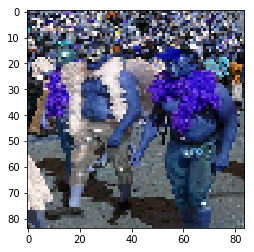

IndexError: list index out of range

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
# print (len(images))
# ind = np.random.randint(len(labsp))
# img = images[ind]
# gn = labgn[ind]
# sp = labsp[ind]
# plt.imshow(img)
# plt.show()
# print (gn, sp)
# if gn == 20:
#     gn = 0
# print ('global label: {}, specific label: {}'\
#        .format(labgn_str[gn], labsp_str[sp]))

ind = np.where(labsp==195)[0]
ind = ind[np.random.randint(len(ind))]
plt.imshow(images[ind])
plt.show()
# print (labgn[ind])
if labgn[ind]==20:
    print ('specific: {}'.format(labsp_str[ind]))
else:
    print ('general: {} , specific: {}'.format(labgn_str[labgn[ind]],
                                               labsp_str[labsp[ind]]))


In [90]:
for i, l in enumerate(labgn_str):
    print (i, l)


0 garment
1 musical instrument, instrument
2 restraint, constraint
3 feline, felid
4 instrument
5 hound, hound dog
6 electronic equipment
7 passerine, passeriform bird
8 ungulate, hoofed mammal
9 aquatic bird
10 snake, serpent, ophidian
11 primate
12 protective covering, protective cover, protect
13 terrier
14 saurian
15 building, edifice
16 establishment
17 tool
18 craft
19 game equipment


In [91]:
for i, l in enumerate(labsp_str):
    print (i,l)

0 suit, suit of clothes
1 ocarina, sweet potato
2 combination lock
3 jaguar, panther, Panthera onca, Felis onca
4 assault rifle, assault gun
5 Saluki, gazelle hound
6 oscilloscope, scope, cathode-ray oscilloscope, CRO
7 brambling, Fringilla montifringilla
8 zebra
9 hourglass
10 bustard
11 sea snake
12 modem
13 gibbon, Hylobates lar
14 colobus, colobus monkey
15 thimble
16 proboscis monkey, Nasalis larvatus
17 American coot, marsh hen, mud hen, water hen, Fulica americana
18 bulbul
19 birdhouse
20 flute, transverse flute
21 sundial
22 marimba, xylophone
23 fur coat
24 Irish terrier
25 redbone
26 Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis
27 common iguana, iguana, Iguana iguana
28 missile
29 barometer
30 Gila monster, Heloderma suspectum
31 siamang, Hylobates syndactylus, Symphalangus syndactylus
32 albatross, mollymawk
33 safety pin
34 mosque
35 Norwegian elkhound, elkhound
36 water ouzel, dipper
37 magnetic compass
38 Scotch terrier, Scottish terrier